In [1]:
##I did most of it myself, but I looked at the work from ZeusHofstetter (who gives its git link first)
#when I got stuck... It helped me understand some code logic when I didn't succeed to get it.
#I prefered not to be stuck too long on something and to try to do as much as possible different stuff.
#Not sure it's the best solution but at least I managed to finish first 2 questions - and possibly the 3rd one
#by Thursday; this one I'm trying to do it without looking at anyone else code.
############
#QUESTION 1#
############

%config InlineBackend.figure_format='retina'
%matplotlib inline

import numpy as np
np.random.seed(123)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 8)
plt.rcParams["font.size"] = 14
from sklearn.utils import check_random_state

In [16]:
%config InlineBackend.figure_format='retina'
%matplotlib inline

import numpy as np
np.random.seed(123)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 8)
plt.rcParams["font.size"] = 14
from sklearn.utils import check_random_state

from sklearn.datasets import make_blobs

labels = ["b", "r"]
X, y = make_blobs(n_samples=400, centers=23, random_state=42)
y = np.take(labels, (y < 10))

Text(0,0.5,'Feature 2')

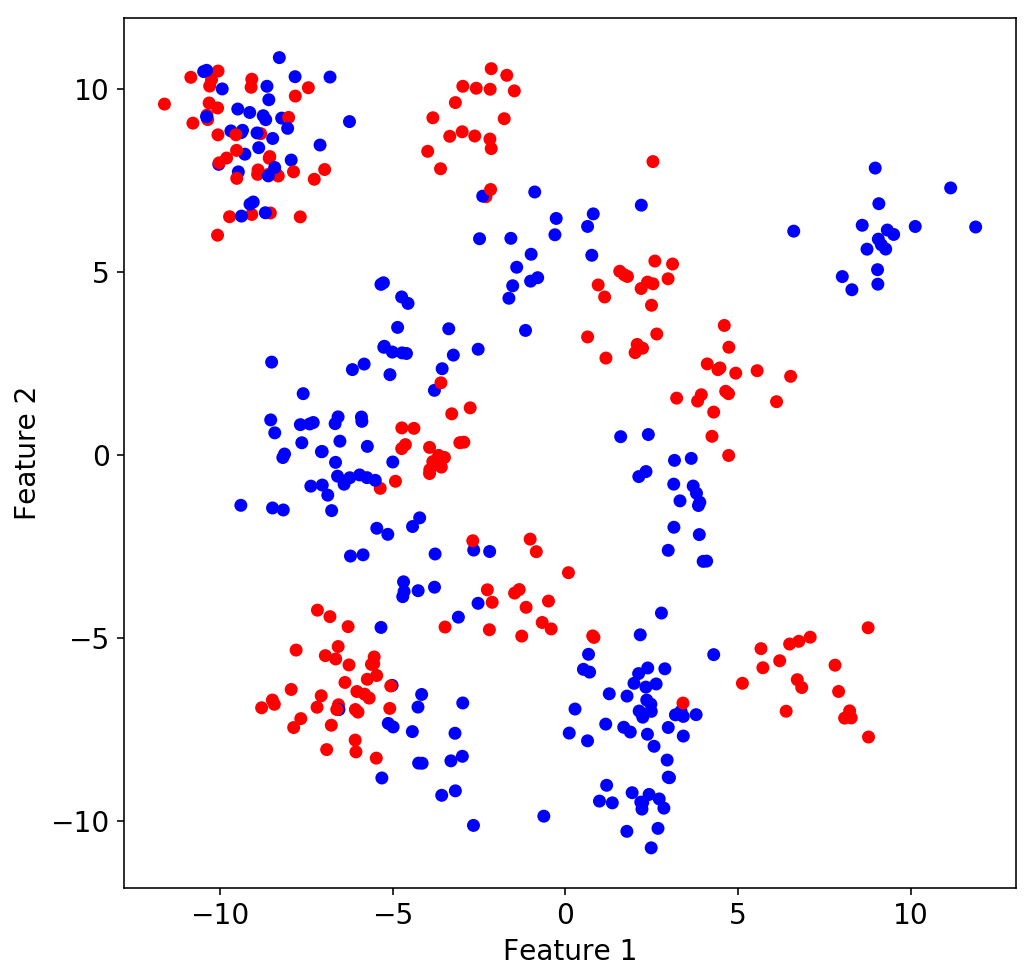

In [18]:
# Your solution
#plot your dataset
plt.scatter(X[:, 0], X[:, 1], c=y, lw=1, s=30)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

In [20]:
#split your dataset into a training and testing set. Comment on how you decided to split your data.
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X, y, train_size=0.8, random_state=42)
#I used 80% of the dataset as trainer. But it was arbitrary...

#evaluate the performance of the classifier on your training dataset.
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X, y)
print("KNN perf on training DS:", clf.score(X_train, y_train))
    
#evaluate the performance of the classifier on your testing dataset.
print("KNN perf on test DS:", clf.score(X_test, y_test))

KNN perf on training DS: 0.903125
KNN perf on test DS: 0.9125


/home/arnaud/anaconda2/envs/ATC2018/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [5]:
#repeat the above two steps for varying splits (10-90, 20-80, 30-70, ...) and comment on what you see.
accuracies_test = []
accuracies_train = []
splitRange = np.arange(0.1, 1, 0.1)
for n in splitRange:
    X_train,X_test, y_train,y_test = train_test_split(X, y, train_size=n)
    clf = KNeighborsClassifier(n_neighbors=5)
    clf.fit(X_train, y_train)
    train_scores=(clf.score(X_train, y_train))
    test_scores=(clf.score(X_test, y_test))
    accuracies_train.append(train_scores)
    accuracies_test.append(test_scores)
print("split ranges are ", splitRange)
print("training scores:", accuracies_train)
print("test scores:", accuracies_test)
#Accuracies are much higher when a big portion of the DS is attributed to the training set (as expected). 
#For very low fraction (10 or 20%) of the DS in the training set, the accuracy of KNN on the test part of the DS
#is very low. But still if the test part is too small the test accuracy decreases.

#Is there a "best" way to split your data?
#I guess we should always have at least more than 50% of the dataset dedicated to the training.

#comment on why the two performance estimates agree or disagree.

split ranges are  [0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
training scores: [0.775, 0.8875, 0.9333333333333333, 0.9125, 0.93, 0.9166666666666666, 0.9142857142857143, 0.9125, 0.8972222222222223]
test scores: [0.6083333333333333, 0.73125, 0.875, 0.8541666666666666, 0.815, 0.86875, 0.825, 0.8125, 0.825]


/home/arnaud/anaconda2/envs/ATC2018/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


/home/arnaud/anaconda2/envs/ATC2018/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


best mean cross-validation score: 0.844
best parameters: {'n_neighbors': 5}
test-set score: 0.838


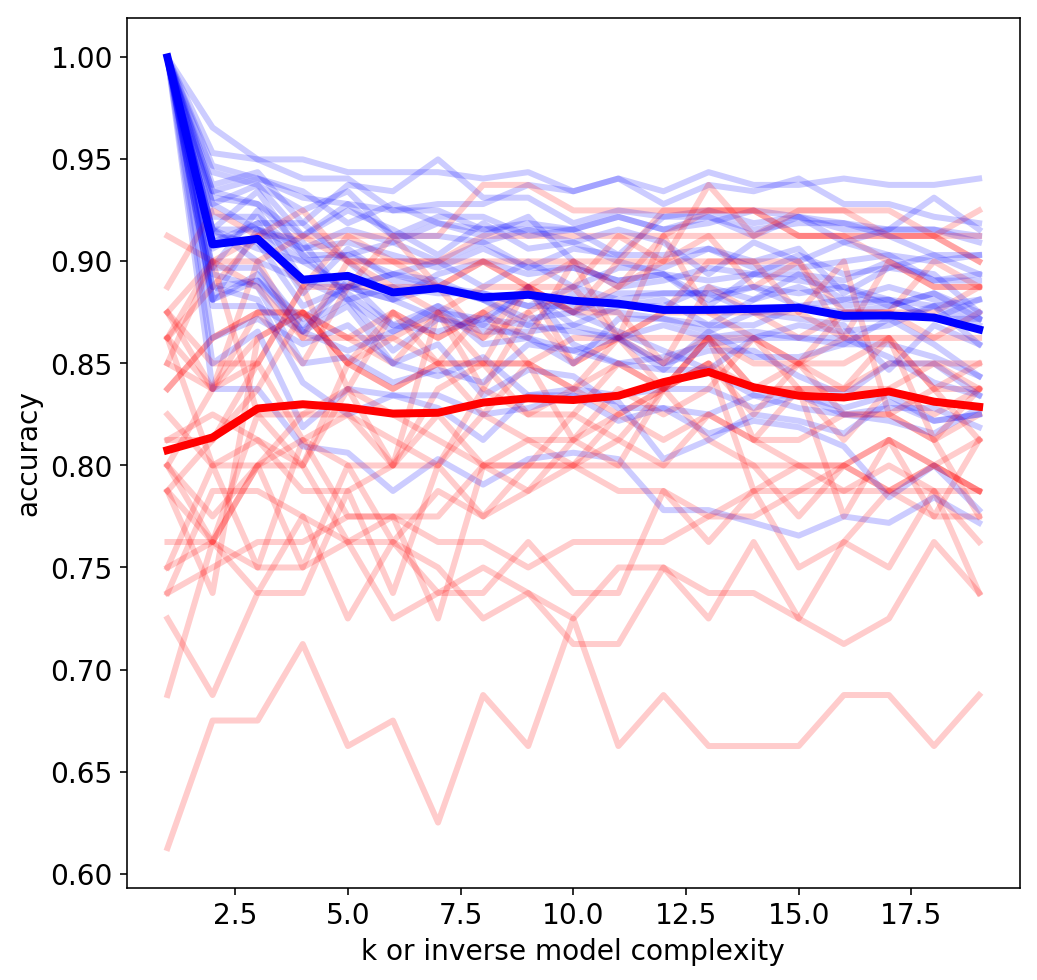

In [21]:
#plot the accuracy of the classifier as a function of n_neighbors.
from sklearn.model_selection import train_test_split
accuracies_test = []
accuracies_train = []
#splitRange = np.arange(0.1, 1, 0.1)
ks = np.arange(1, 20, 1)
for n in range(30):
    # Create a new dataset each iteration
    X, y = make_blobs(n_samples=400, centers=23, random_state=42+n)
    y = np.take(labels, (y < 10))
    X_train,X_test, y_train,y_test = train_test_split(X, y, train_size=0.8)
    train_scores = []
    test_scores = []
    for k in ks:
        clf = KNeighborsClassifier(n_neighbors=k)
        clf.fit(X_train, y_train)
        train_scores.append(clf.score(X_train, y_train))
        test_scores.append(clf.score(X_test, y_test))
    accuracies_train.append(train_scores)
    accuracies_test.append(test_scores)
        #break

    plt.plot(ks, train_scores, c='b', alpha=0.2, lw=3)
    plt.plot(ks, test_scores, c='r', alpha=0.2, lw=3)
plt.xlabel('k or inverse model complexity')
plt.ylabel('accuracy')
plt.plot(ks, np.array(accuracies_test).mean(axis=0), label='Test', c='r', lw=4)
plt.plot(ks, np.array(accuracies_train).mean(axis=0), label='Train', c='b', lw=4)
#comment on the similarities and differences between the performance on the testing and training dataset.
#Accuracy is varying greatly for a low nb of neighbors. >4 neighbors accuracies are more constant.
#The smallest difference between both accuracy seems to be around k=10
#At low value of k, the test model is underfitting; at very high value of k it would overfit to the training set.

#is a KNeighbor Classifier with 4 or 10 neighbors more complicated?
#With 10 neighbors it is less complicated, counter intituively. Because for each new neighbors, you delete 
# a free parameter. Increasing the number of k neighbors reduce the total number of free parameters and hence 
# the complexity of the model.

#find the best setting of n_neighbors for this dataset.
#why is this the best setting?
# It looks like it's around 10. It is the best setting because both accuracy are not too small (as the testing 
# accuracy would be for very high number of neighbors); and also because it's the point where the two accuracies
# are the closest to each other.


#If we use the code part from the end of the lecture, we find a best number of neighbors = 7.
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors':  np.arange(1, 15, 2)}# set of parameters we want to try
grid = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, cv=10)
grid.fit(X_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))
print("test-set score: {:.3f}".format(grid.score(X_test, y_test)))

/home/arnaud/anaconda2/envs/ATC2018/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


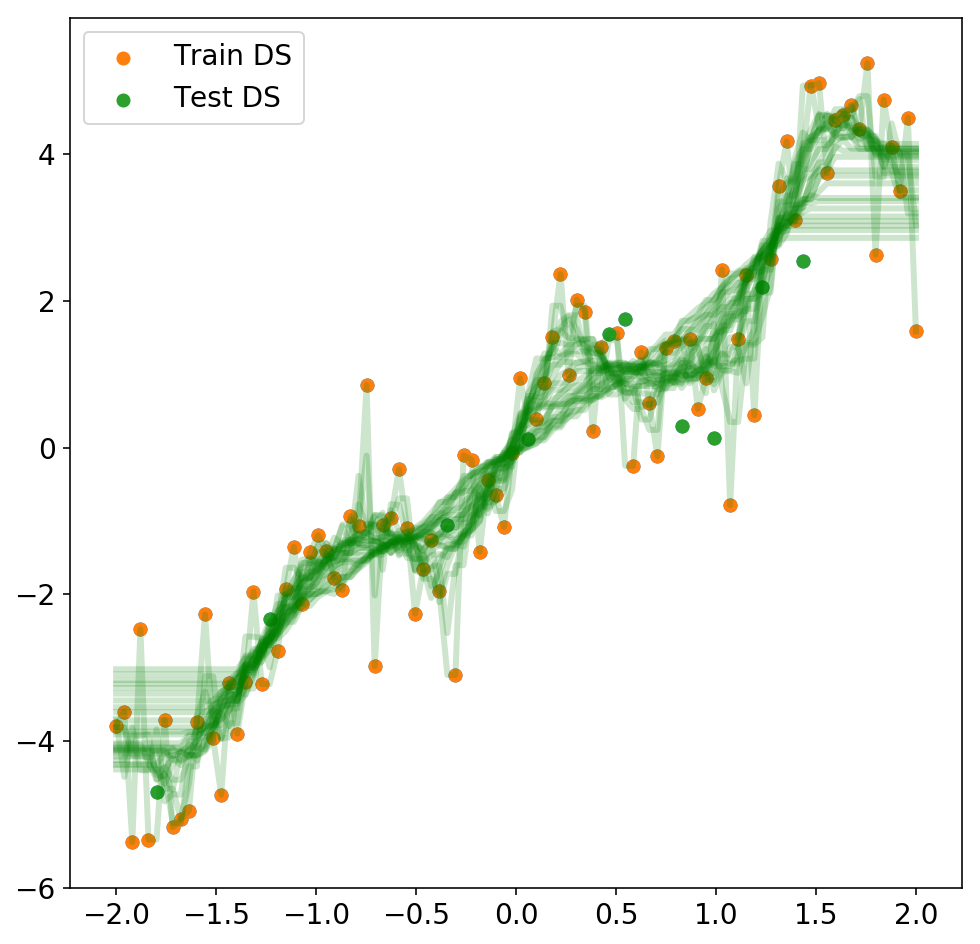

In [7]:
############
#QUESTION 2#
############
def make_regression(n_samples=100, noise_level=0.8, random_state=2):
    rng = check_random_state(random_state)
    X = np.linspace(-2, 2, n_samples)
    y = 2 * X + np.sin(5 * X) + rng.randn(n_samples) * noise_level
    
    return X.reshape(-1, 1), y

#plot your dataset
X, y = make_regression(n_samples=100, noise_level=0.8, random_state=2)
plt.scatter(X,y)

#fit a kNN regressor with varying number of n_neighbors and compare each regressors predictions to the location
#of the training and testing points.
from sklearn.neighbors import KNeighborsRegressor
ks = np.arange(1,30,1)
X_train,X_test,y_train,y_test = train_test_split(X, y, train_size=0.9)
plt.scatter(X_train,y_train, label='Train DS')
plt.scatter(X_test,y_test, label='Test DS')

for k in ks:
    regressor = KNeighborsRegressor(n_neighbors=k)
    regressor.fit(X_train, y_train)
    plt.plot(X, regressor.predict(X), '-g', alpha=0.2, lw=3)
plt.legend(loc='best')

#If we plot just with 1, 2, 3, 10 kneighbors, to see each line individually, we see that at k=1 the regressor line 
#is going through all the train points. If we increase k, the line become smoother. For k=50 it enventually is
#totally overfitted.

/home/arnaud/anaconda2/envs/ATC2018/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


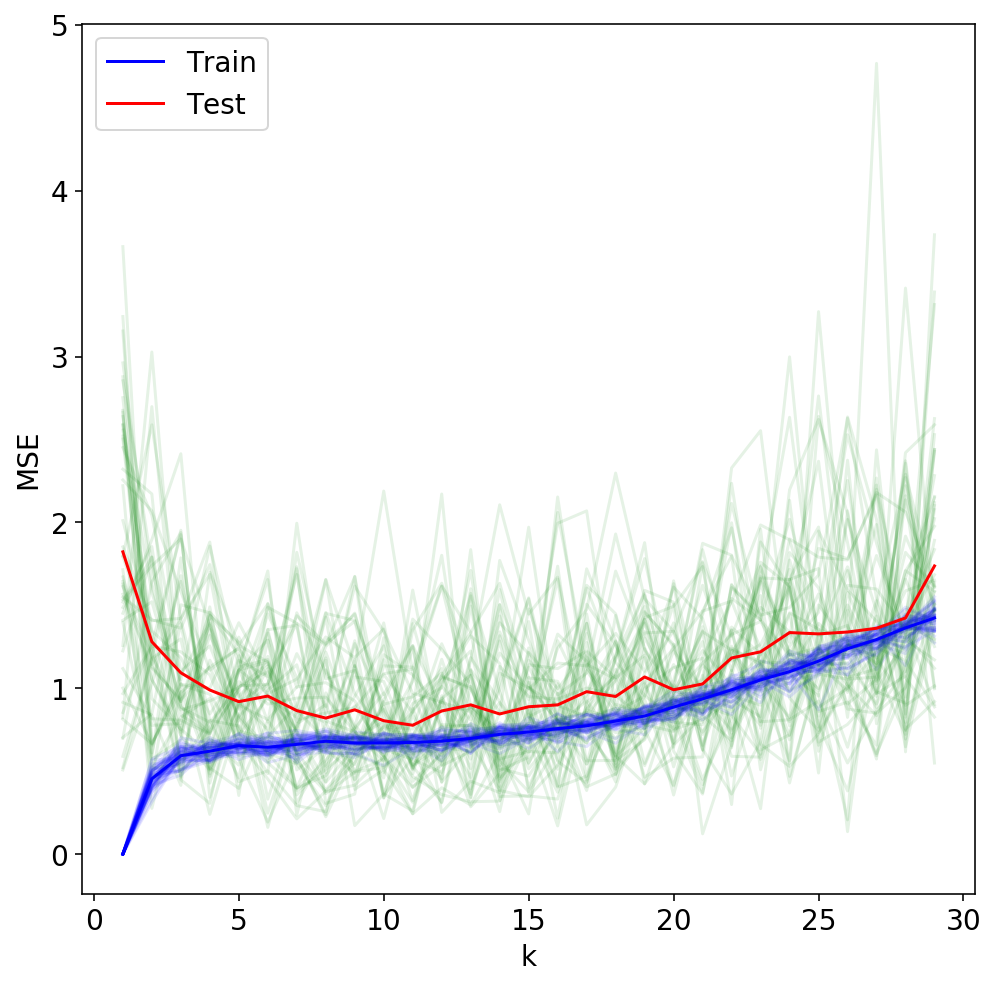

In [8]:
#plot the mean squared error of the classifier as a function of n_neighbors for both training and testing datasets.
from sklearn.metrics import mean_squared_error

ks = np.arange(1,30,1)
totError_train=[]
totError_test=[]

for k in ks:
    er_test=[]
    er_train=[]
    for n in range(50):
        X_train,X_test,y_train,y_test = train_test_split(X, y, train_size=0.9)
        regressor = KNeighborsRegressor(n_neighbors=k)
        regressor.fit(X_train,y_train)
        er_train.append(mean_squared_error(regressor.predict(X_train), y_train))
        er_test.append(mean_squared_error(regressor.predict(X_test), y_test))
        #break
    totError_train.append(er_train)
    totError_test.append(er_test)
    #break

totError_test=np.array(totError_test)
totError_train=np.array(totError_train)

for n in range(50):
    plt.plot(ks, totError_train[:,n], c='b', alpha=0.1)
    plt.plot(ks, totError_test[:,n], c='g', alpha=0.1)

plt.plot(ks, totError_train.mean(axis=1), label='Train', c='b')
plt.plot(ks, totError_test.mean(axis=1), label='Test', c='r')
plt.xlabel('k')
plt.ylabel('MSE')
plt.legend(loc='best')

#comment on the similarities and differences between the performance on the testing and training dataset.
#Trend is similar to the classification exercise. At very low K the testing set has a big error, then it becomes
#more reasonable. The training set always increase its error with the number of k. We should aim where both of
# the MSE are low, aka to k=5, more or less.

#find the best setting of n_neighbors for this dataset.
#It looks like it's around 5.
#why is this the best setting?
#Because it's where the mse values are the lowest for both tests.


#can you explain why the mean square error on the training dataset plateaus between ~n_neihgors=5 to 15 at the value
#that it does?
#It's not really a plateau on my plot :/

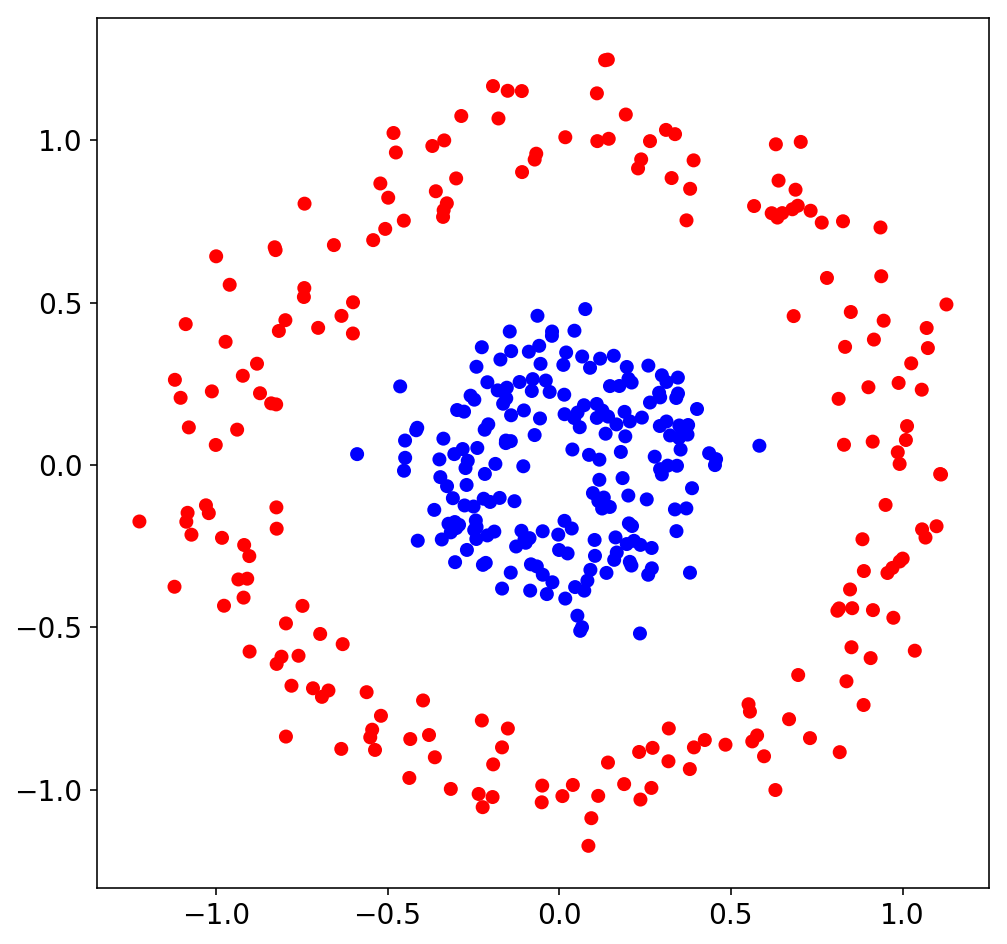

In [9]:
#############
# QUESTION 3#
#############
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=400, factor=.3, noise=.1)
labels = ['b', 'r']
y = np.take(labels, (y < 0.5))

plt.scatter(X[:,0], X[:,1], c=y)

/home/arnaud/anaconda2/envs/ATC2018/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
No handles with labels found to put in legend.


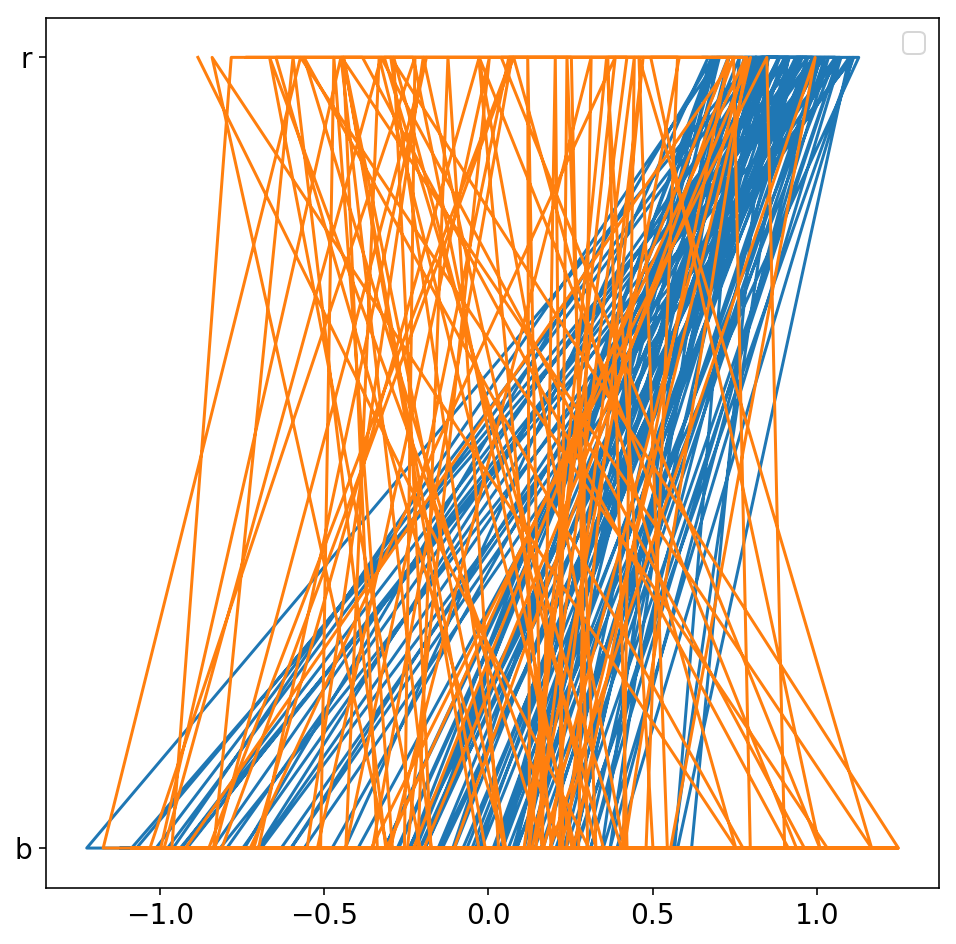

In [10]:
#Logistic regression. Use a more complex linear model to create a two class classifier for the "circle inside
#a circle" problem. Think about what method you could use to increase the complexity of a logistic regression
#model. Visualise the classification accuracy as a function of the model complexity.
#use the LogisticRegression classifier to answer the above question.
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
import numpy as np
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.9)

def cart2pol(X):
    POL=np.copy(X)
    POL[:,0] = np.sqrt(X[:,0]**2 + X[:,1]**2)
    POL[:,1] = np.arctan2(X[:,1], X[:,0])
    return(POL)

Polar_X_train = cart2pol(X_train)
Polar_X_test = cart2pol(X_test)

LR = LogisticRegression(C=2)
LR.fit(Polar_X_train,y_train)
plt.plot(X,LR.predict(X))

#for k in ks:
 #   LR = LogisticRegression(C=2)
    #KNNrgr = KNeighborsRegressor(n_neighbors=k)
  #  LR.fit(X_train,y_train)
   # plt.plot(X,LR.predict(X))
     #break.
    
plt.legend(loc='best')

In [4]:
#from utils import plot_surface
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6)
for p in range(1, 5):
    clf = make_pipeline(PolynomialFeatures(p), LogisticRegression())
    clf.fit(X_test, y_test)
    print(p, clf.score(X_test, y_test))
    
clf = make_pipeline(PolynomialFeatures(2), LogisticRegression())
clf.fit(X_test, y_test)
plot_surface(clf, X, y)

NameError: name 'X' is not defined